In [28]:
import pandas as pd
#from ast import literal_eval
df = pd.read_json('../Datasets/Cell_Phones_and_Accessories_5.json', lines=True, )
df.describe()


,overall,unixReviewTime
count,194439.000000,1.944390e+05
mean,4.129912,1.368714e+09
std,1.222499,3.230032e+07
min,1.000000,9.828000e+08
25%,4.000000,1.357603e+09
50%,5.000000,1.374538e+09
75%,5.000000,1.390262e+09
max,5.000000,1.406074e+09


In [6]:
df['helpful_0'] = df['helpful'].apply(func=lambda x: x[0])
df['helpful_1'] = df['helpful'].apply(func=lambda x: x[1])
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helpful_0,helpful_1
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014",0,0
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014",0,0
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014",0,0
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013",4,4
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013",2,3


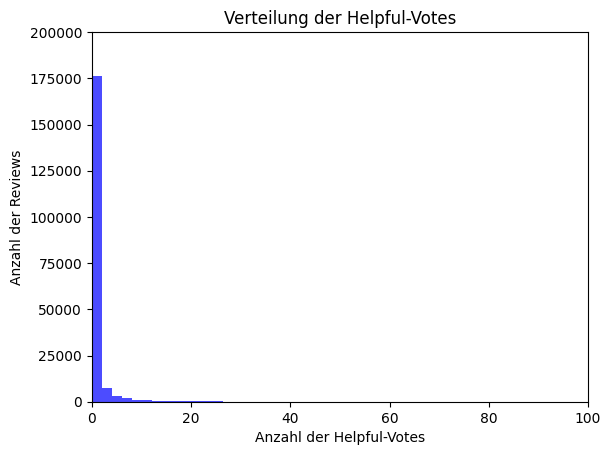

In [22]:
import matplotlib.pyplot as plt

plt.hist(df['helpful_1'], bins=1000, color='blue', alpha=0.7)
plt.title('Verteilung der Helpful-Votes')
plt.xlabel('Anzahl der Helpful-Votes')
plt.ylabel('Anzahl der Reviews')
plt.axis((0, 100, 0, 200000))
plt.show()

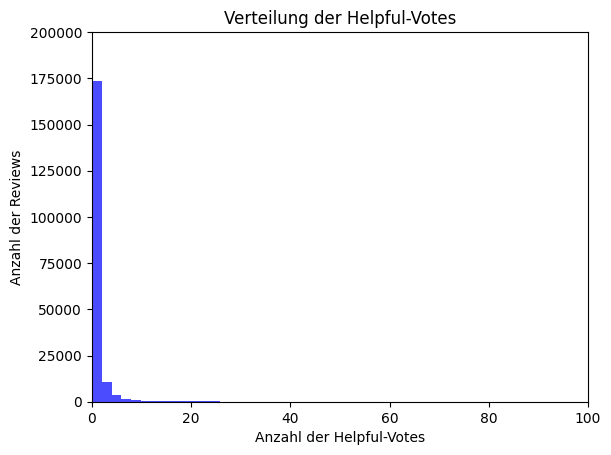

In [21]:
plt.hist(df['helpful_0'], bins=1000, color='blue', alpha=0.7)
plt.title('Verteilung der Helpful-Votes')
plt.xlabel('Anzahl der Helpful-Votes')
plt.ylabel('Anzahl der Reviews')
plt.axis((0, 100, 0, 200000))
plt.show()

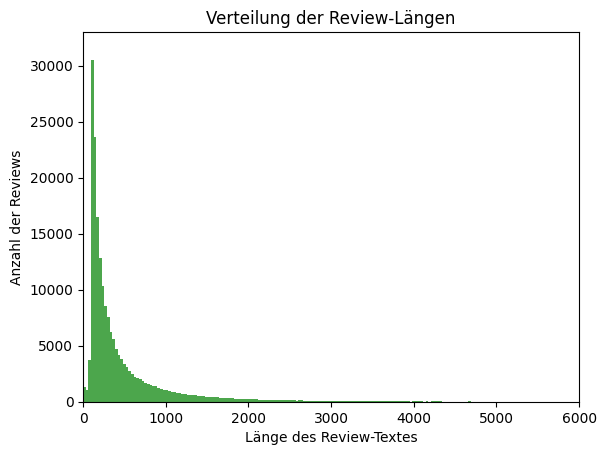

In [37]:
df['review_length'] = df['reviewText'].apply(len)

plt.hist(df['review_length'], bins=1000, color='green', alpha=0.7)
plt.title('Verteilung der Review-Längen')
plt.xlabel('Länge des Review-Textes')
plt.ylabel('Anzahl der Reviews')
plt.axis((0, 6000, 0, 33000))
plt.show()

In [41]:
df['helpful_0'] = df['helpful'].apply(func=lambda x: x[0])
df['helpful_1'] = df['helpful'].apply(func=lambda x: x[1])
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,review_length,sentiment,helpful_0,helpful_1
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014",189,0.391667,0,0
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014",160,0.533333,0,0
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014",166,0.573828,0,0
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013",275,0.600000,4,4
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013",135,0.360000,2,3


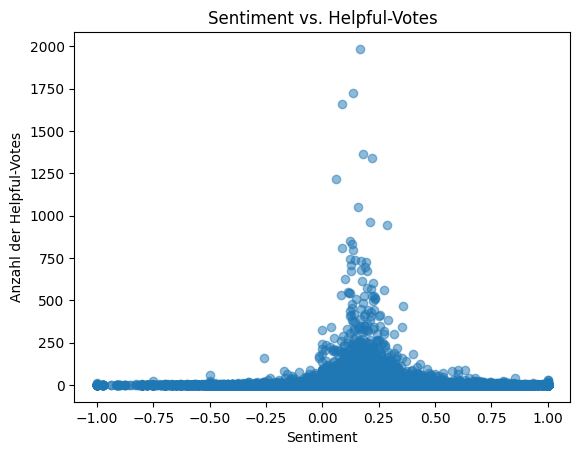

In [42]:
from textblob import TextBlob

df['sentiment'] = df['reviewText'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.scatter(df['sentiment'], df['helpful_0'], alpha=0.5)
plt.title('Sentiment vs. Helpful-Votes')
plt.xlabel('Sentiment')
plt.ylabel('Anzahl der Helpful-Votes')
plt.show()